# Introduction to Statistics

In [4]:
import pandas as pd
import numpy as np
import pylab as pl

import seaborn as sns

%matplotlib inline

In [1]:
from scipy.stats import norm, gamma, beta

In [19]:
x = pd.Series(norm.rvs(0, 10, 1000))
# .plot.hist()

In [20]:
y = pd.Series(gamma.rvs(1, 5, 1, size=1000))
# .plot.hist()

In [21]:
pd.DataFrame(data={'X': x, 'Y': y}).plot.scatter('X', 'Y')

### 1. NumPy

---

1. Without Data (filled with Zeros)

In [2]:
np.ndarray(shape=(2,2), dtype=float, order='F')

array([[  0.00000000e+000,   2.12329096e-314],
       [  0.00000000e+000,   2.78136357e-309]])

In [3]:
np.ndarray(shape=(2,2))

array([[  0.00000000e+000,   2.12329096e-314],
       [  0.00000000e+000,   2.78136357e-309]])

---

2. With Data

In [4]:
np.array([[1, 2, 9], [3, 4, 0]])

array([[1, 2, 9],
       [3, 4, 0]])

In [5]:
arr1 = np.arange(15).reshape(5, 3); arr1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [ ]:
# Press tab after the dot to see a list of methods
arr1.

In [6]:
print arr1.T

[[ 0  3  6  9 12]
 [ 1  4  7 10 13]
 [ 2  5  8 11 14]]


In [7]:
arr1.cumsum?

In [8]:
arr1.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21],
       [ 9, 19, 30],
       [12, 25, 39]])

---
## Summary Statistics

- Problem: Given a bunch of datapoints:
    - characterize the distribution in one or two values
    - Characterization should be robust to outliers

In [9]:
dummyArray = np.random.randn(16).reshape(4, 4)

In [10]:
dummyArray

array([[-0.76779376,  0.58531848,  0.34069859,  0.25013023],
       [ 2.21115424,  0.15600531, -1.43045455,  0.35353878],
       [-0.92809673, -0.30783973,  0.35549142,  0.21404613],
       [ 0.42656125,  0.59795417, -0.10012557, -1.33022656]])

In [11]:
print(np.mean(dummyArray))
print(np.median(dummyArray))

0.0391476063364
0.232088178505


## The Mean

- Represents center of mass
- If the values are close together this is a good representative
- There will ALWAYS exist a mean - but it will not always be helpful.
- Influenced by Outliers

## The Median

- 50th Percentile
- A Median always exists
- Median is not unique
- Can be computed in linear time
- Not influenced by outliers (robust)

---

## Percentiles

- Classical summary statistics good for describing the body of the distribution
- Need information about the tail of the distributions
- Determine outliers in a dataset

In [12]:
np.percentile(dummyArray, [35, 45, 65])

array([-0.03609285,  0.19953592,  0.35032873])

Applications in Data Cleaning:

- Identifying outliers.
- Treat outliers by capping them at 5th and 95th percentiles.

---
## Task1:

- Create a 10 x 8 ndarray, 
    - fill it with rnorm values, 
    - cap all values greater than the 90th percetile and below the 10th percentile at these threholds

In [14]:
r_arr = np.random.randn(80).reshape(10, 8)

In [15]:
np.percentile(r_arr, [10, 90])

array([-0.89972084,  1.57343785])

In [20]:
r_arr[r_arr > np.percentile(r_arr, 90)] = np.percentile(r_arr, 90)
r_arr[r_arr < np.percentile(r_arr, 10)] = np.percentile(r_arr, 10)

In [22]:
print r_arr

[[ 1.20290537 -0.89972084  0.74399865  0.34373411 -0.08246287  1.57215946
  -0.89972084  1.20796893]
 [-0.01174019 -0.89972084 -0.2945027   0.08576551 -0.40832555  1.09414473
   0.64690328  0.01599473]
 [ 1.57215946  0.81676178 -0.89972084  0.70421112 -0.89972084  0.37445507
   0.07952109 -0.20416734]
 [ 0.83634858  0.05300449  0.51350551  0.36102041 -0.49892788 -0.7615711
   1.57215946 -0.49331832]
 [ 0.36028588  0.25801962  1.25093023  0.67722426 -0.28684858 -0.5754629
   0.59124482 -0.89972084]
 [-0.86234055  1.17333697 -0.20874052  0.95964354  0.10890803  1.05261068
  -0.89972084  0.94230974]
 [ 0.35314878 -0.17777105  1.4841079   0.23010735 -0.89906222  0.92959479
   0.06319883  1.57201741]
 [ 1.30791763  0.16867471  0.08602662  0.21448174  1.24884318  1.57215946
   0.58856601  0.78652551]
 [-0.65054156  0.53150221 -0.6436069   1.57215946 -0.89972084 -0.13058088
  -0.51107154 -0.75972997]
 [ 1.57215946 -0.17595469  0.11873521  0.30470135 -0.78138099  0.70119505
   1.57215946  1.57

**What is the IQR?**

- The interquartile range of a sample X is defined as: `IQR(X) = Q(0.75,X) - Q(0.25,X)`
- It is a robust measure for variance of the data. 
- Good alternative to standard / mean deviation.

**What is an outlier?**

- Def. (Tukey, 1969) a k-outlier is a data point X which is either
    - larger than `Q(0.75) + k * IQR(X)` or
    - smaller than `Q(0.25) - k * IQR(X)`
    
---    

In [ ]:
# Create an array with 80 random numbers (from the Normal Distribution)
vals = np.random.randn(80)
thresh = np.percentile(vals, [10, 90])

In [ ]:
pl.hist(vals)

In [ ]:
# Use boolean subsetting to isolate the values.
vals[vals < thresh[0]] = thresh[0]
vals[vals > thresh[1]] = thresh[1]

In [ ]:
pl.hist(vals)

---
# Standard Deviation

- Measure the 'typical' displacement from the mean value.
- Standard deviation is popular because it has extremely nice mathematical properties.
- Standard deviation is a good deviation for normal distributed data
- Large effect on Outliers

## Caution with Standard Deviation
Everybody Learns about standard deviation in school
Beautiful mathematical properties!
Everybody knows

- "68% of data falls within 1 std-dev of the mean"
- "95% falls within 2 std-dev of the mean"
- "99.7" falls within 3 std-dev of the mean"

> "Problem is: this is utter nonsense". Only true for normally distributed data.

- Not good for measuring outliers!

In [23]:
arr2 = np.random.randn(24).reshape(4, 6)

In [24]:
print arr2

[[ 0.66726952 -1.24974582 -0.2826512   0.7393791  -1.03238434  0.19938496]
 [ 1.54107625  0.13827378  3.14760763  0.14061417 -0.10854388  1.58497835]
 [ 1.09205734  0.78921368  0.07328925  0.78512573  1.88232541  0.38278933]
 [ 1.10190365  0.23023285  0.67375833 -0.81278248 -0.37724796  1.08505046]]


In [25]:
arr2.std(axis=1)

array([ 0.77309536,  1.14922513,  0.57041594,  0.71869891])

In [26]:
arr2.std(axis=0)

array([ 0.30897787,  0.75078833,  1.34024288,  0.64456811,  1.08741816,
        0.55487986])

---
### **Distributions**

<img src = 'http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png'>

## Normal

In [29]:
from IPython.display import Image
url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png'
Image(url,height=400,width=600)

In [30]:
np.random.normal?

In [31]:
normalArray = np.random.normal(0, 1, 10000)

In [32]:
normalArray.mean()

0.00086986505699327386

In [33]:
normalArray.std()

0.99644967909369875

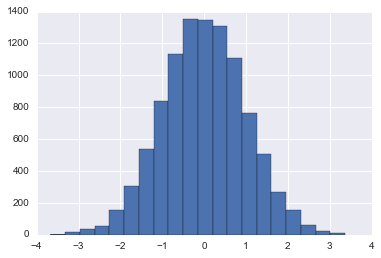

In [35]:
pl.hist(normalArray, 
        bins=20, 
        label="Histogram of Gaussian Data");

---

## Poisson

In [38]:
np.random.poisson?

In [49]:
pois_arr = np.random.poisson(1, 10000)

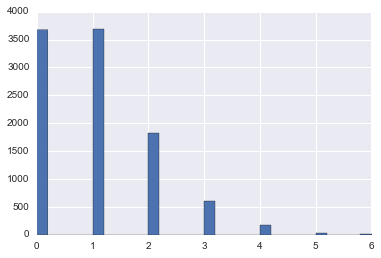

In [50]:
pl.hist(pois_arr,  bins=30);

In [ ]:
np.mean(pois_arr)

In [ ]:
np.std(pois_arr)

---
### Pareto Distribution

In [52]:
from scipy import stats

In [53]:
pareto_arr = stats.pareto.rvs(50, size=10000)

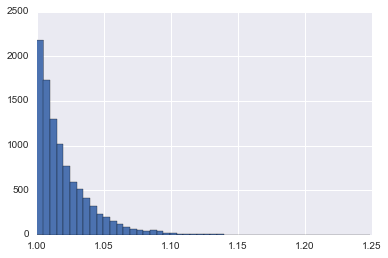

In [56]:
pl.hist(pareto_arr, bins=50);

In [55]:
stats.describe(pareto_arr)

DescribeResult(nobs=10000, minmax=(1.0000025184392987, 1.2491196600258954), mean=1.020711707974822, variance=0.00044618268694846224, skewness=2.0962170417132433, kurtosis=7.144447918010419)

---
### Bimodal (two peaks) Normal Curve

In [57]:
twoNormalArrays = np.array([np.random.normal(0, 2, 10000), np.random.normal(10, 4, 10000)])

In [ ]:
twoNormalArrays.flatten?

In [58]:
twoNormalArrays = twoNormalArrays.flatten()

In [ ]:
twoNormalArrays

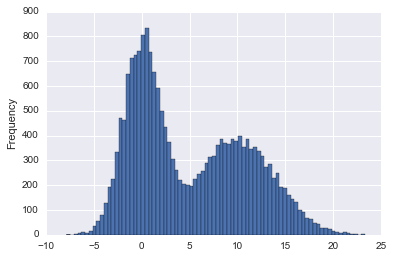

In [59]:
pd.Series(twoNormalArrays).plot(kind='hist', bins=80);

In [ ]:
stats.describe(twoNormalArrays)

---
## Binomial

In [ ]:
np.random.binomial?

In [60]:
binom_arr = np.random.binomial(100, 0.2, size=10000)

In [ ]:
binom_arr.shape

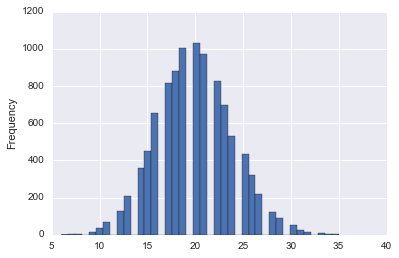

In [61]:
pd.Series(binom_arr).plot(kind='hist', bins=40);

In [ ]:
stats.describe(binom_arr)

---